## Advanced Regression Assignment - House Prediction

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 1500

### Read and understand Data

In [53]:
# Reading Dataset
df = pd.read_csv('train.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [54]:
df.shape

(1460, 81)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [56]:
#check for % of null values
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

### Data cleaning

In [57]:
# checking for the null values in the rows with numerical data
df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull()                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [58]:
# Replace null values with median for columns 'LotFrontage' and 'MasVnrArea'
df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())

In [59]:
# Replace null values in 'GarageYrBlt' with 0 as it is an year column
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0).astype(int)

In [60]:
# checking null values from categorical columns
df.select_dtypes(include=['object']).isnull().sum()[df.select_dtypes(include=['object']).isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [61]:
# Drop columns with very high Nulls and unnecessary columns
df.drop(['Alley'], axis = 1, inplace = True)
df.drop(['MiscFeature'], axis = 1, inplace = True)
df.drop(['PoolQC'], axis = 1, inplace = True)
df.drop(['GarageQual'], axis = 1, inplace = True)
df.drop(['GarageCond'], axis = 1, inplace = True)
df.drop(['BsmtFinType1'], axis = 1, inplace = True)
df.drop(['BsmtFinType2'], axis = 1, inplace = True)
df.drop(['BsmtCond'], axis = 1, inplace = True)
df.drop(['Street'], axis = 1, inplace = True)
df.drop(['LandContour'], axis = 1, inplace = True)
df.drop(['Utilities'], axis = 1, inplace = True)
df.drop(['LandSlope'], axis = 1, inplace = True)
df.drop(['Condition1'], axis = 1, inplace = True)
df.drop(['Condition2'], axis = 1, inplace = True)
df.drop(['BsmtFinSF1'], axis = 1, inplace = True)
df.drop(['BsmtFinSF2'], axis = 1, inplace = True)
df.drop(['Heating'], axis = 1, inplace = True)
df.drop(['CentralAir'], axis = 1, inplace = True)
df.drop(['LowQualFinSF'], axis = 1, inplace = True)
df.drop(['BsmtHalfBath'], axis = 1, inplace = True)
df.drop(['KitchenAbvGr'], axis = 1, inplace = True)
df.drop(['Functional'], axis = 1, inplace = True)
df.drop(['PavedDrive'], axis = 1, inplace = True)
df.drop(['WoodDeckSF'], axis = 1, inplace = True)
df.drop(['PoolArea'], axis = 1, inplace = True)
df.drop(['EnclosedPorch'], axis = 1, inplace = True)
df.drop(['3SsnPorch'], axis = 1, inplace = True)
df.drop(['ScreenPorch'], axis = 1, inplace = True)

In [62]:
# replace NA with None for all the above listed columns
for column in ('MasVnrType', 'BsmtQual', 'BsmtExposure', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish',
            'Fence'):
    df[column]=df[column].fillna('None')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  RoofMatl       1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

### EDA

In [64]:
# Numeric Data
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,150,...,8,0,2003,2,548,61,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,284,...,6,1,1976,2,460,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,434,...,6,1,2001,2,608,42,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,540,...,7,1,1998,3,642,35,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,490,...,9,1,2000,3,836,84,0,12,2008,250000


In [65]:
# Drop ID Column
df_num = df_num.drop(['Id'], axis=1)
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,150,856,...,8,0,2003,2,548,61,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,284,1262,...,6,1,1976,2,460,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,434,920,...,6,1,2001,2,608,42,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,540,756,...,7,1,1998,3,642,35,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,490,1145,...,9,1,2000,3,836,84,0,12,2008,250000


<AxesSubplot:ylabel='TotalBsmtSF'>

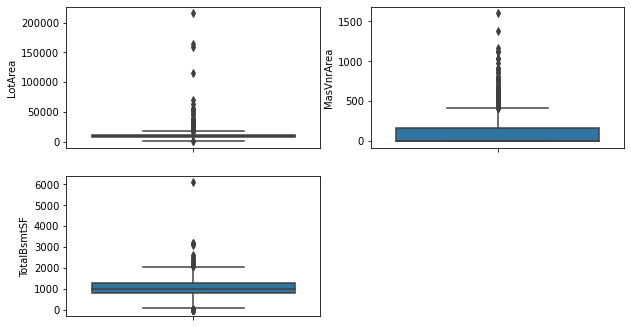

In [66]:
plt.figure(figsize=(10,15))
plt.subplot(5,2,1)
sns.boxplot(y = 'LotArea', data = df)
plt.subplot(5,2,2)
sns.boxplot(y = 'MasVnrArea', data = df)
plt.subplot(5,2,3)
sns.boxplot(y = 'TotalBsmtSF', data = df)

In [67]:
#Treat outliers for above 95%
LotArea_quartile = df['LotArea'].quantile(0.95)
df = df[df["LotArea"] < LotArea_quartile]

MasVnrArea_quartile = df['MasVnrArea'].quantile(0.95)
df = df[df["MasVnrArea"] < MasVnrArea_quartile]

TotalBsmtSF_quartile = df['TotalBsmtSF'].quantile(0.95)
df = df[df["TotalBsmtSF"] < TotalBsmtSF_quartile]

### Data viz

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

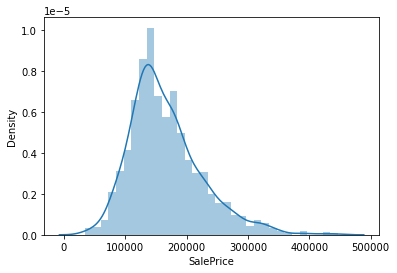

In [68]:
sns.distplot(df['SalePrice'])

In [69]:
# salesprice is skewed towards left. so, let's transform and centralize
df['SalePrice']=np.log1p(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

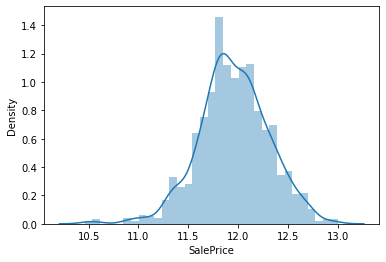

In [70]:
sns.distplot(df['SalePrice'])

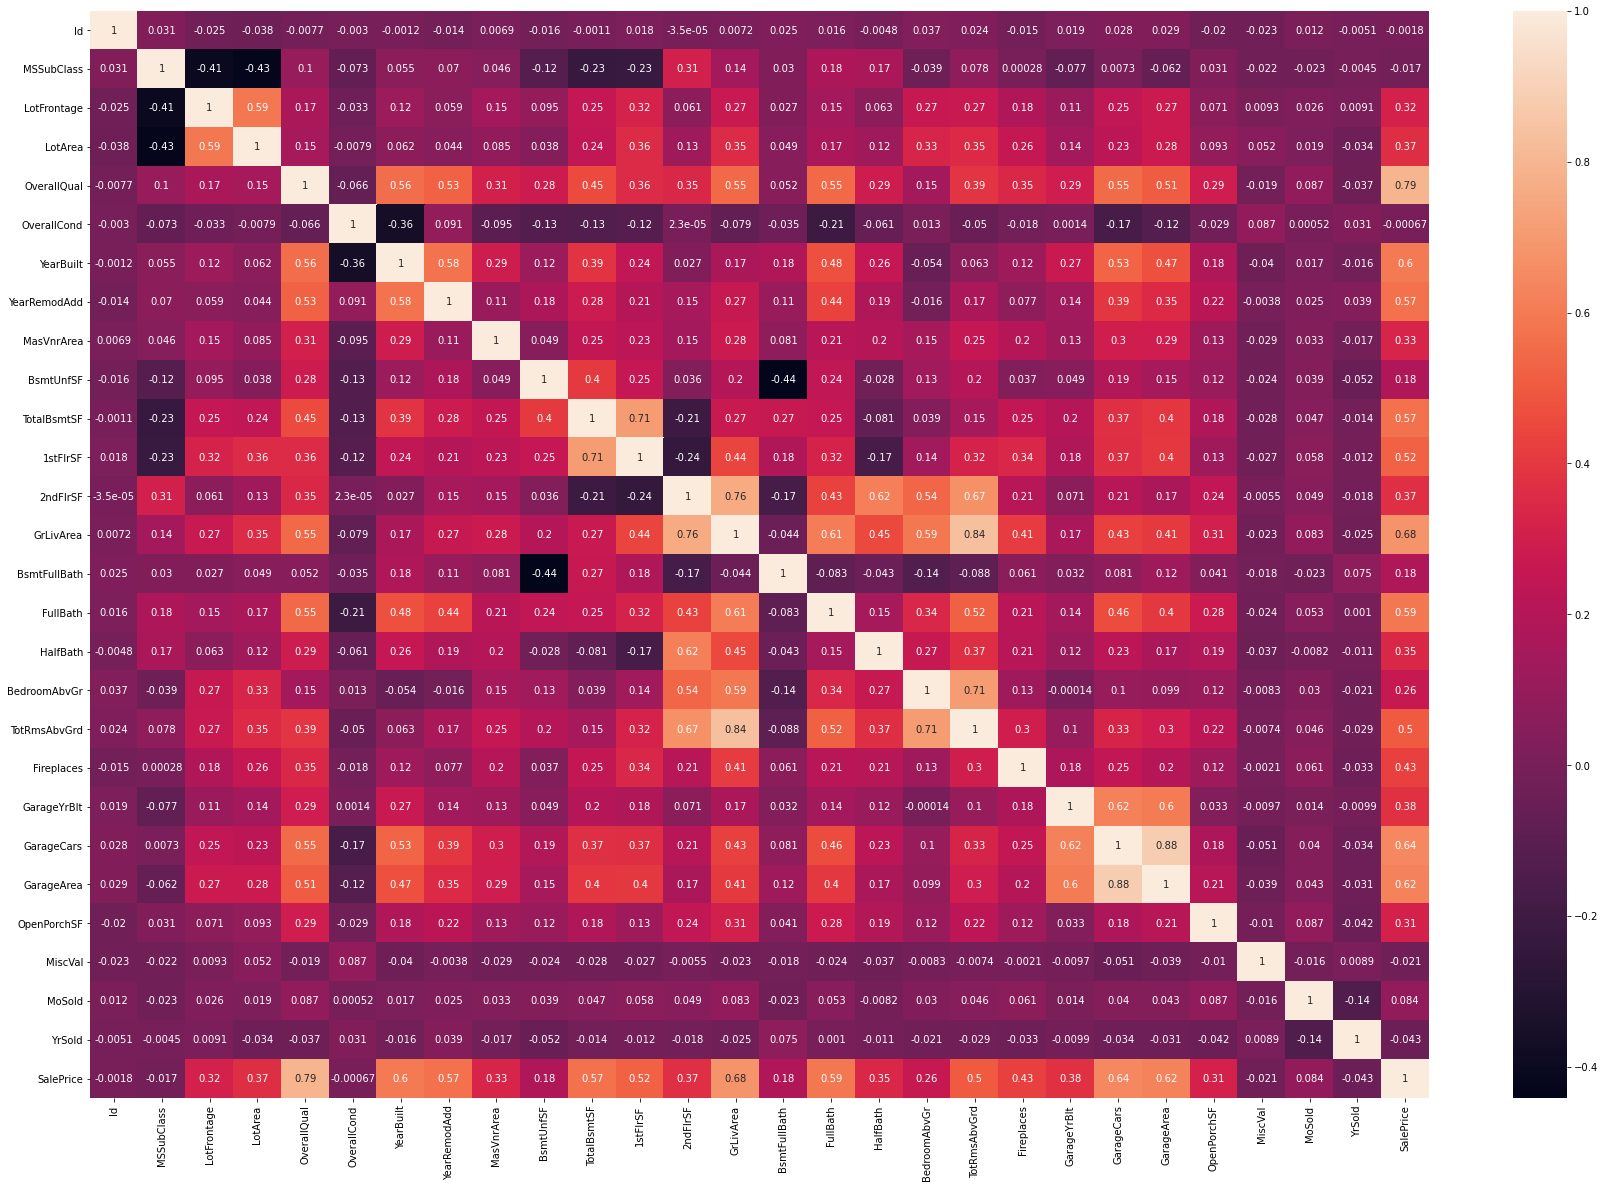

In [71]:
plt.figure(figsize = (30, 20))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [72]:
# Remove highly correlated vars

df.drop(['GarageArea'], axis = 1, inplace = True)
df.drop(['GarageCars'], axis = 1, inplace = True)
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageYrBlt,GarageFinish,OpenPorchSF,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2003,RFn,61,None,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,1976,RFn,0,None,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2001,RFn,42,None,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,1998,Unf,35,None,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,2000,RFn,84,None,0,12,2008,WD,Normal,12.429220
5,6,50,RL,85.0,14115,IR1,Inside,Mitchel,1Fam,1.5Fin,...,1993,Unf,30,MnPrv,700,10,2009,WD,Normal,11.870607
6,7,20,RL,75.0,10084,Reg,Inside,Somerst,1Fam,1Story,...,2004,RFn,57,None,0,8,2007,WD,Normal,12.634606
7,8,60,RL,69.0,10382,IR1,Corner,NWAmes,1Fam,2Story,...,1973,RFn,204,None,350,11,2009,WD,Normal,12.206078
8,9,50,RM,51.0,6120,Reg,Inside,OldTown,1Fam,1.5Fin,...,1931,Unf,0,None,0,4,2008,WD,Abnorml,11.774528
9,10,190,RL,50.0,7420,Reg,Corner,BrkSide,2fmCon,1.5Unf,...,1939,RFn,4,None,0,1,2008,WD,Normal,11.678448


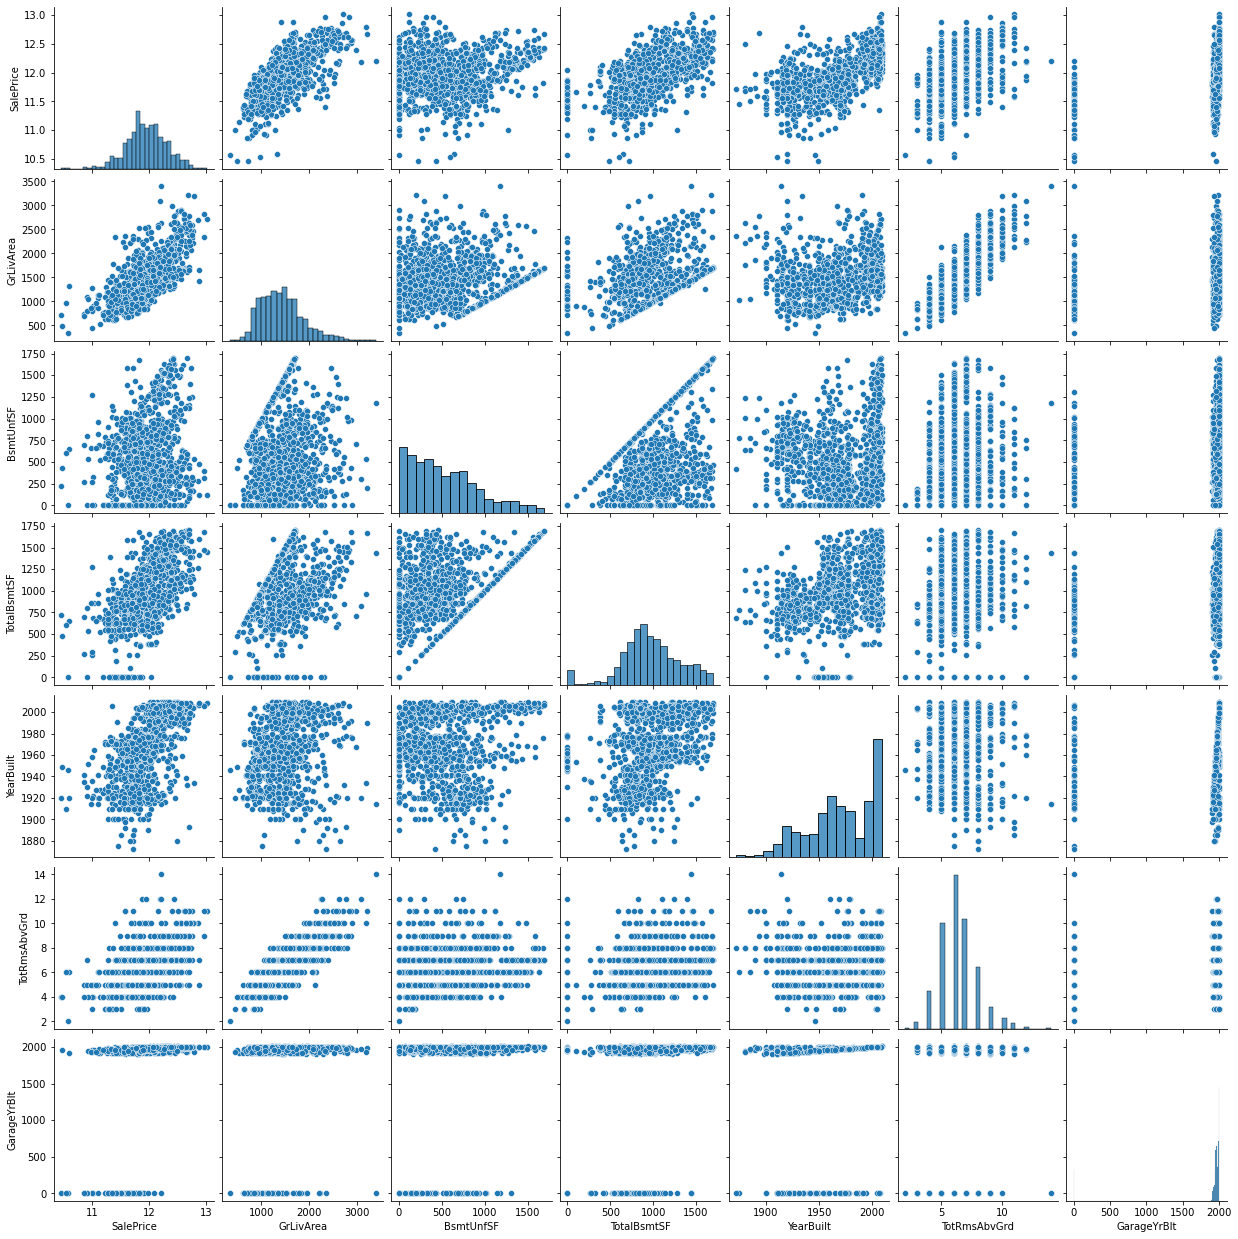

In [73]:
cols = ['SalePrice', 'GrLivArea', 'BsmtUnfSF', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [74]:
df = df.drop(['BsmtUnfSF'], axis = 1)
df = df.drop(['TotRmsAbvGrd'], axis = 1)
df = df.drop(['GarageYrBlt'], axis = 1)    


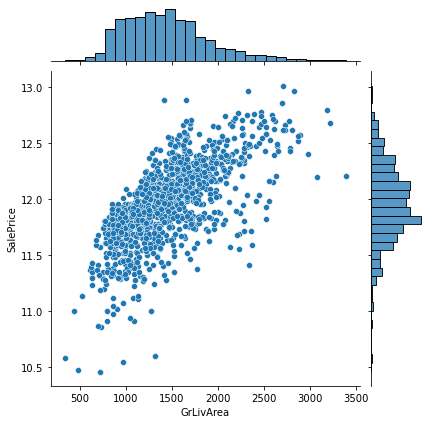

In [75]:
sns.jointplot(x = df['GrLivArea'], y = df['SalePrice'])
plt.show()

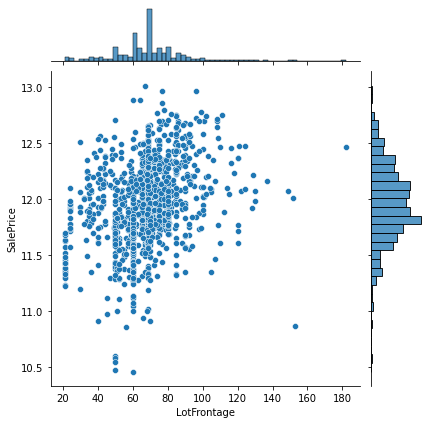

In [76]:
sns.jointplot(x = df['LotFrontage'], y = df['SalePrice'])
plt.show()

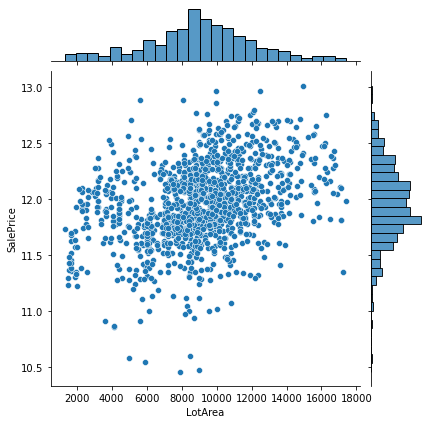

In [78]:
sns.jointplot(x = df['LotArea'], y = df['SalePrice'])
plt.show()

In [79]:
# Property Age = yearsold - yearbuilt
df['ProAge'] = (df['YrSold'] - df['YearBuilt'])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageFinish,OpenPorchSF,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ProAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,RFn,61,None,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,RFn,0,None,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,RFn,42,None,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,Unf,35,None,0,2,2006,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,RFn,84,None,0,12,2008,WD,Normal,12.429220,8


In [80]:
df = df.drop(['MoSold'], axis = 1)
df = df.drop(['YrSold'], axis = 1)
df = df.drop(['YearBuilt'], axis = 1)
df = df.drop(['YearRemodAdd'], axis = 1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,FireplaceQu,GarageType,GarageFinish,OpenPorchSF,Fence,MiscVal,SaleType,SaleCondition,SalePrice,ProAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,None,Attchd,RFn,61,None,0,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,TA,Attchd,RFn,0,None,0,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,TA,Attchd,RFn,42,None,0,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,Gd,Detchd,Unf,35,None,0,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,TA,Attchd,RFn,84,None,0,WD,Normal,12.429220,8


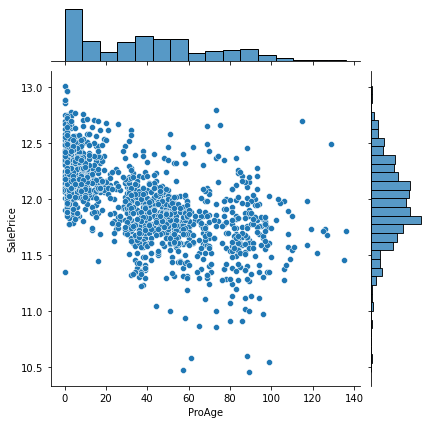

In [81]:
sns.jointplot(x = df['ProAge'], y = df['SalePrice'])
plt.show()

In [82]:
df = df.drop(['MiscVal', 'RoofMatl', 'Fence','Id' ], axis = 1)

In [83]:
df = pd.get_dummies(df, drop_first=True )
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,856,856,854,1710,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,1262,1262,0,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,920,920,866,1786,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,756,961,756,1717,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,1145,1145,1053,2198,...,0,0,0,0,1,0,0,0,1,0


In [84]:
X = df.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,856,856,854,1710,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,1262,1262,0,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,920,920,866,1786,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,756,961,756,1717,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,1145,1145,1053,2198,...,0,0,0,0,1,0,0,0,1,0


In [85]:
y = df['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

### Train Test Split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=0)

In [111]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# running RFE
rfe = RFE(lr, 50)            
rfe = rfe.fit(X_train, y_train)

In [112]:
#calculate r-sqaured, RSS, RMSE for Linear regression fit
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

metric=[]
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9260035987039962
0.8649812987637433
7.944289604347989
6.502798114866005
0.009079188119254844
0.01729467583740959


### Ridge Regression

In [113]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [114]:
print(model_cv.best_params_)

{'alpha': 20}


In [115]:
alpha = 20
ridge = Ridge(alpha = alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.76356988e-04  4.91002338e-05  1.05601597e-05  4.97239834e-02
  5.82223840e-02 -9.81023702e-06  1.68192831e-04  5.77169639e-05
  6.93026353e-05  2.32429343e-04  5.57334704e-02  1.50473667e-02
  3.33962353e-03 -2.86847721e-03  2.07587784e-02  2.16363820e-05
 -3.22441128e-03  3.76605733e-02  6.53278694e-03  3.91501975e-02
 -9.38523244e-03  1.75034677e-02 -1.80180528e-03  2.85659461e-03
  1.10667287e-02 -9.29618491e-03  4.55356972e-04  4.09612105e-03
 -1.87045774e-04 -1.09666122e-03  2.47771492e-02  1.60151025e-02
 -2.74213672e-03  5.49205537e-02 -4.63210421e-02 -3.07932755e-02
 -3.11215619e-02 -3.18703370e-02 -3.52930281e-03 -1.49794494e-03
  1.43320891e-02 -2.62212499e-02 -8.37478600e-03  3.52303937e-02
 -1.53451383e-02 -2.06317433e-03 -1.51080550e-02  4.85412813e-03
  4.74059676e-02  1.23992322e-02  2.06490108e-03  1.80180154e-03
 -6.73131450e-03 -9.76549327e-03 -1.79560531e-02  2.18545487e-02
 -2.37558825e-03 -1.01922912e-02 -9.44583220e-03  9.26972569e-03
  1.70440874e-03  1.77978

In [116]:
#calculate r-sqaured, RSS, RMSE for Ridge Regression fit
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2=[]
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.910753967925035
0.8771007116024703
9.581497375883067
5.91910049194891
0.010950282715294935
0.015742288542417316


### Lasso

In [117]:
# Fitting the model using Lasso Regression.
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [118]:
#Finding the best parameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [119]:
# At alpha 0.001 let's fit the model again.
alpha = 0.001
lasso = Lasso(alpha = alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-2.42411123e-04 -0.00000000e+00  1.04460415e-05  5.46550812e-02
  5.84890567e-02  3.42893891e-05  1.65523076e-04  5.90511241e-05
  7.30379811e-05  2.33838022e-04  5.82036798e-02  6.16545972e-03
 -0.00000000e+00 -1.89537498e-04  2.49484362e-02  3.04660572e-05
 -3.42330714e-03  3.17651386e-02  0.00000000e+00  5.70457681e-02
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  2.24112191e-02  0.00000000e+00
  0.00000000e+00  7.23635555e-02 -3.97392188e-02 -2.07892516e-02
 -1.45477178e-02 -2.31875719e-02 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -9.93478001e-03 -0.00000000e+00  3.34459768e-02
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  6.69127583e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  1.96077382e-02
 -0.00000000e+00 -4.08587846e-03 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000

In [120]:
#calculate r-sqaured, RSS, RMSE using Lasso Regression fit.
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9053575801282536
0.8774338394556099
10.160856192314
5.903056320618779
0.011612407076930287
0.015699617873986115


# Conclusion

The difference between r2 values of test and train data is low with Lasso Regression that means the model doesn't overfit.

The optimal lambda value of Ridge and Lasso respectively are:

Ridge - 20
Lasso - 0.001

The Mean Squared error of Ridge and Lasso respectively are:

Ridge - 0.015742
Lasso - 0.015699

MSE of Ridge is slightly higher than Lasso